<a href="https://colab.research.google.com/github/komh9575/first-repository/blob/main/Day03_%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[사전 준비] 라이브러리 및 한글 폰트 설치**

(이 코드 셀은 실습 시작 전 맨 처음에 한 번만 실행해 주세요.)


In [1]:
# 필요 라이브러리 설치
!pip install statsmodels

# 코랩에서 한글 폰트 사용을 위한 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작 안내
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.
# 런타임을 다시 시작해야 한글 폰트가 적용됩니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

---


## **문제 1 (난이도: 하): 게임 아이템 뽑기 확률, 정말 10%일까?**

**시나리오:**
어떤 게임 개발사에서 새로운 아이템의 뽑기 확률이 10%로 설정되었다고 주장하고 있습니다. 유저 커뮤니티에서는 "실제 확률은 10%보다 낮은 것 같다"는 의혹이 제기되었습니다. 이를 확인하기 위해 한 유저가 아이템을 200번 뽑았고, 그중 12번 성공했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 이항검정(Binomial Test)을 사용하여, 이 유저의 결과(200번 중 12번 성공)가 개발사의 주장(P=0.1)을 기각하고 "확률이 10%보다 낮은 것 같다"는 의혹을 뒷받침할 만큼 통계적으로 유의미한지 검증하세요.


In [3]:
import scipy.stats as stats

# 문제 설정
n = 200  # 총 시행 횟수
x = 12   # 관찰된 성공 횟수
p = 0.1  # 귀무가설에서의 성공 확률

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설): 아이템 뽑기 성공 확률은 10%이다. (P = 0.1)
# H₁ (대립가설): 아이템 뽑기 성공 확률이 10%보다 낮다. (P < 0.1)

# [작성] 이항검정을 수행하고 p-값을 계산하세요.
# '확률이 더 낮은 것 같다'는 주장을 검증하려면 alternative 인수를 어떻게 설정해야 할까요?
p_value = stats.binomtest(x, n, p, alternative='less').pvalue

print(f"관찰 결과: {n}번 시도 중 {x}번 성공")
print(f"검정 결과 p-value: {p_value:.4f}")

# [작성] 유의수준 0.05를 기준으로 통계적 결론을 내리는 코드를 작성하세요.
alpha = 0.05
if p_value < alpha:
    print(f"p-value({p_value:.4f})는 유의수준({alpha})보다 작으므로, 귀무가설을 기각합니다.")
    print("따라서, 실제 아이템 뽑기 성공 확률이 10%보다 낮다고 결론 내릴 수 있습니다.")
else:
    print(f"p-value({p_value:.4f})는 유의수준({alpha})보다 크므로, 귀무가설을 기각할 수 없습니다.")
    print("따라서, 실제 아이템 뽑기 성공 확률이 10%보다 낮다고 단정하기 어렵습니다.")

관찰 결과: 200번 시도 중 12번 성공
검정 결과 p-value: 0.0320
p-value(0.0320)는 유의수준(0.05)보다 작으므로, 귀무가설을 기각합니다.
따라서, 실제 아이템 뽑기 성공 확률이 10%보다 낮다고 결론 내릴 수 있습니다.


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** Part 1에서 계산된 p-값의 의미를 직접 눈으로 확인해 봅시다. **"만약 개발사의 주장대로 실제 확률이 정말 10%라면"**, 200번 뽑기를 했을 때 성공 횟수가 어떻게 분포하는지 시뮬레이션을 통해 알아보고, 우리가 관찰한 '12번 성공'이 얼마나 희귀한 일인지 확인하세요.


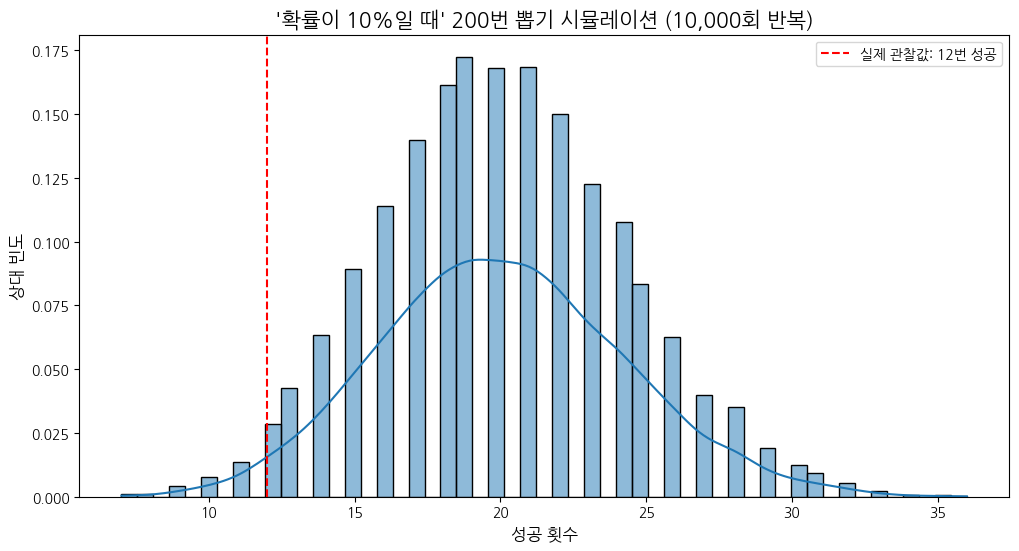

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 실제 확률 p = 0.1
# 200번 뽑기를 10,000번 반복 수행
num_simulations = 10000 # 쉼표 제거

# [작성] numpy의 이항분포 랜덤 함수를 사용하여 시뮬레이션 결과를 생성하세요.
simulated_successes = np.random.binomial(n=n, p=p, size=num_simulations)

# 2. 시각화
plt.figure(figsize=(12, 6))
# [작성] 시뮬레이션 결과(simulated_successes)를 히스토그램으로 그리세요.
sns.histplot(simulated_successes, kde=True, stat='density')

plt.axvline(x=x, color='red', linestyle='--', label=f'실제 관찰값: {x}번 성공')
plt.title("'확률이 10%일 때' 200번 뽑기 시뮬레이션 (10,000회 반복)", fontsize=15)
plt.xlabel("성공 횟수", fontsize=12)
plt.ylabel("상대 빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  Part 1에서 구한 `p-value`는 Part 2 그래프의 어느 부분에 해당하며, 무엇을 의미하나요?

- 현실에서 얻은 데이터가 귀무가설이 옳은 세계에서는 얼마나 나타나기 쉬운지, 또는 어려운지를 평가하는 확률을 의미한다. 이 값은 확률이므로 보통 0이상 1이하의 값이 된다. 이 그래프에서는 빨간색 점선(12회)를 기준으로 왼쪽 꼬리 부분의 면적이 p-value가 된다.

2.  시뮬레이션 그래프를 볼 때, 우리가 관찰한 '12회 성공'은 개발사의 주장이 맞다는 가정 하에 흔한 일인가요, 드문 일인가요?
- 12회의 성공은 평균 20회 보다 작다. 이에 왼쪽 꼬리에 위치하며, 드문 일이 된다.  개발사의 주장이 맞다고 본다면 이러한 주장은 자주 일어나지 않는 편이 된다.

3.  이 시뮬레이션 경험을 통해 "p-값이 작으면 귀무가설을 기각한다"는 규칙을 친구에게 어떻게 더 쉽게 설명할 수 있을까요?
- p-value각 작다는 것은 '이 가정이 낮다면 이러한 결과는 거의 나오지 않는다'는 뜻이다. 이에 그 가정을 다시 의심할 필요성이 있는 것이다. 그래서 귀무가설을 기각하는 결론이 나오게 된다.

---


## **문제 2 (난이도: 하): 과자 한 봉지의 중량은 150g이 맞을까?**

**시나리오:**
한 식품 공장에서 생산하는 과자 한 봉지의 목표 중량은 150g입니다. 품질관리팀은 생산 공정이 목표 중량을 잘 맞추고 있는지 확인하기 위해, 생산된 과자 30봉지를 무작위로 추출하여 무게를 측정했습니다. (측정 데이터는 아래 코드에 제공)


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 일표본 t-검정(One-sample t-Test)을 사용하여, 추출된 과자 샘플의 평균 무게가 목표 중량 150g과 통계적으로 유의미한 차이가 있는지 검증하세요.


In [5]:
from scipy import stats
import numpy as np

# 주어진 데이터
np.random.seed(42)
sample_weights = np.random.normal(loc=151.5, scale=2, size=30)
pop_mean = 150 # 목표 중량 (모평균)

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설): 과자 한 봉지의 목표 중량이 150g이 맞지 않다.
# H₁ (대립가설): 과자 한 봉지의 목표 중량이 150g이 맞다.

# [작성] 일표본 t-검정을 수행하여 t-통계량과 p-값을 구하세요.
t_statistic, p_value = stats.ttest_1samp(sample_weights, pop_mean)

print(f"샘플 평균 무게: {np.mean(sample_weights):.2f}g")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# [작성] 유의수준 0.05를 기준으로 통계적 결론을 내리는 코드를 작성하세요.
alpha = 0.05
# 여기에 코드 작성
if p_value < alpha:
    print("귀무가설을 기각한다.: 평균 중량은 150g이 아니다.")
else :
    print("귀무가설을 기각하지 않는다.: 평균 중량은 150g이 맞다.")


샘플 평균 무게: 151.12g
t-statistic: 3.4193
p-value: 0.0019
귀무가설을 기각한다.: 평균 중량은 150g이 아니다.


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설이 사실일 때, 즉 **"과자 봉지의 평균 무게가 정확히 150g이라면"** 어떤 결과들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다.
이를 통해 우리가 실제로 관찰한 샘플 평균(약 151.5g)이 얼마나 특이한 값인지 직접 확인해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


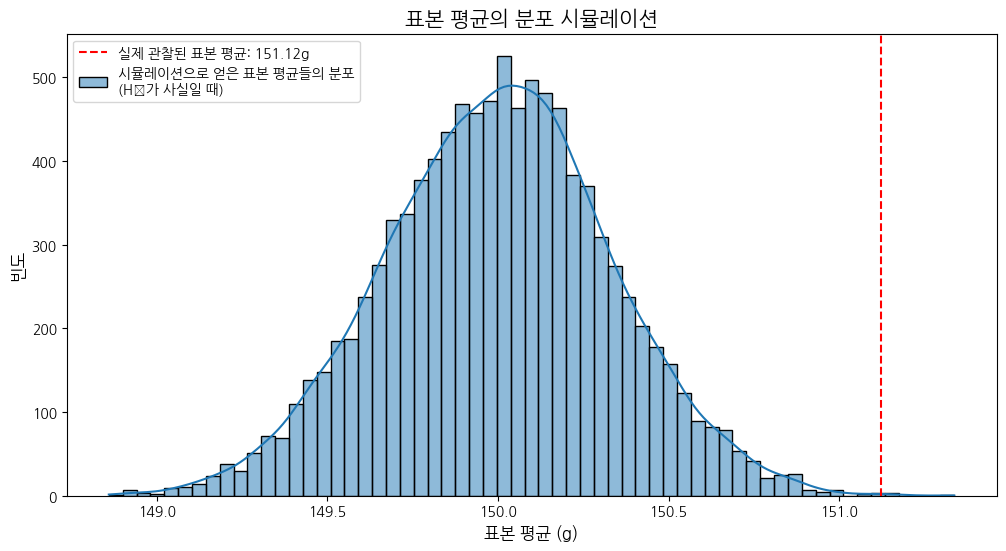

In [6]:
import numpy as np

# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 평균(loc) = 150g
# 표준편차는 우리가 가진 샘플의 표준편차를 사용한다고 가정
# 30개짜리 샘플을 10,000번 뽑기
num_simulations = 10000
sample_size = 30
simulated_means = []

# [작성] for 반복문을 사용하여 시뮬레이션을 10,000번 수행하세요.
sample_std = np.std(sample_weights, ddof=1)
# 각 반복마다 H₀가 사실인 모집단에서 30개의 샘플을 뽑고, 그 평균을 simulated_means 리스트에 추가하세요.
for _ in range(num_simulations):
    simulated_sample = np.random.normal(
        loc=150,                # H₀: 평균 150g
        scale=sample_std,       # 샘플에서 얻은 표준편차
        size=sample_size        # 표본 크기 30
    )
    simulated_means.append(np.mean(simulated_sample))

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_means, kde=True, label='시뮬레이션으로 얻은 표본 평균들의 분포\n(H₀가 사실일 때)')
plt.axvline(x=np.mean(sample_weights), color='red', linestyle='--', label=f'실제 관찰된 표본 평균: {np.mean(sample_weights):.2f}g')
plt.title("표본 평균의 분포 시뮬레이션", fontsize=15)
plt.xlabel("표본 평균 (g)", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  Part 2의 히스토그램은 무엇을 나타내나요? 이 분포의 모양이 정규분포와 비슷한 이유는 무엇일까요? (힌트: 4장에서 배운 개념)
= 이 그래프는 150.0이라는 귀무가설이 참이라고 가정했을 때, 표본크기 30인 표본평균을 10,000번 반복추출하여 계산한 표본 평균들의 분포를 나타낸다. 즉, 표본평균의 표본분포이다. 이 분포 정규 분포와 비슷한 이유는 중심극한정리에 따라 원래 모집단의 분포와 관계없이 표본 크기가 충분히 크면 표본평균의 분포가 정규 분포에 가까워지기 때문이다.

2.  우리가 실제로 관찰한 표본 평균(빨간 점선)은 이 분포에서 흔하게 나타나는 값인가요? Part 1의 p-값과 이 시각적 위치는 어떻게 관련되나요?
= 빨간색 선은 실제로 관찰한 표본평균을 의미한다.(151.2정도) 이 값은 분포의 중심이 아니라 꼬리 부분에 위치하므로 귀무가설이 참일 때 자주 나타나는 값이라고 하기 어렵다. part1에서 계산한 p-value는 빨간 점선보다 더 극단적인 표본평균이 나올 확률을 의미한다. 따라서 p의 값이 작다는 것은 모평균 150이라는 가정 하에서는 이러한 결과가 나올 확률이 드물다는 것을 의미하며, 귀무가설을 기각해야 된다는 근거가 된다.

3.  만약 p-값이 0.001이었다면, 빨간 점선은 그래프의 어디쯤에 위치할 것으로 예상되나요? 이는 공장 입장에서 어떤 조치를 취해야 함을 시사할까요?
= 만약 p-값이 0.001이라면, 빨간 점선은 아주 극단적인 꼬리 부분에 위치하게 될 것이다. 이는 귀무가설이 참일 때 이러한 결과가 나올 확률이 0.1%에 불과하다는 것을 의미하며, 따라서 귀무가설을 기각하고 대립가설(과자 한 봉지의 목표 중량이 150g이 맞다.)를 채택하게 된다. 이때 관측된 평균값의 차이는 "통계적으로 유의미한 차이가 있다"는 결론을 내릴 수 있으며, 이때 대립가설을 지지하는 강한 통계적 증거를 얻었음을 의미한다. 이러한 결과는 공장 입장에서 생산 공정이나 품질관리 기준을 재검토해야 함을 시사한다.

---


## **문제 3 (난이도: 중): 어떤 온라인 학습 방식이 더 효과적일까?**

**시나리오:**
한 교육 기업에서 두 가지 다른 온라인 학습 방식(A, B)을 개발했습니다. 방식 A가 방식 B보다 학생들의 성적 향상에 더 효과적인지 알아보기 위해, 두 그룹의 학생들에게 각각 다른 방식으로 한 달간 학습시킨 후 시험을 보게 했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 이표본 t-검정(Two-sample t-Test)을 수행하여 두 학습 방식 간 평균 점수 차이가 통계적으로 유의미한지 확인하세요. (단, t-검정의 기본 가정인 정규성과 등분산성을 먼저 검증해야 합니다.)


In [10]:
from scipy import stats

# 데이터 생성
np.random.seed(0)
group_a_scores = np.random.normal(loc=85, scale=8, size=50)
group_b_scores = np.random.normal(loc=80, scale=7, size=50)

# [작성] 1. 정규성 검정 (Shapiro-Wilk test)
# H₀: 데이터는 정규분포를 따른다.
# 두 그룹에 대해 각각 정규성 검정을 수행하고 p-값을 출력하세요.
shapiro_a_pvalue = stats.shapiro(group_a_scores).pvalue
shapiro_b_pvalue = stats.shapiro(group_b_scores).pvalue
print(f"A그룹 정규성 검정 p-value: {shapiro_a_pvalue:.4f}")
print(f"B그룹 정규성 검정 p-value: {shapiro_b_pvalue:.4f}")


# [작성] 2. 등분산성 검정 (Levene's test)
# H₀: 두 그룹의 분산은 같다.
# 두 그룹에 대해 등분산성 검정을 수행하고 p-값을 출력하세요.
levene_pvalue = stats.levene(group_a_scores, group_b_scores).pvalue
print(f"등분산성 검정 p-value: {levene_pvalue:.4f}")


# [작성] 3. 이표본 t-검정
equal_var = levene_pvalue >= 0.05

# H₀: 두 그룹의 평균은 같다.
# H₁: 두 그룹의 평균은 다르다.
# 등분산성 가정을 만족했는지 여부에 따라 equal_var 인수를 설정하여 t-검정을 수행하세요.
t_statistic, p_value = stats.ttest_ind(
    group_a_scores,
    group_b_scores,
    equal_var=equal_var)

print(f"\n이표본 t-검정 t-statistic: {t_statistic:.4f}")
print(f"이표본 t-검정 p-value: {p_value:.4f}")


A그룹 정규성 검정 p-value: 0.8766
B그룹 정규성 검정 p-value: 0.8366
등분산성 검정 p-value: 0.0150

이표본 t-검정 t-statistic: 4.0426
이표본 t-검정 p-value: 0.0001


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설, 즉 **"두 학습 방식의 효과가 완전히 똑같다면"** 어떤 결과가 나타날지 시뮬레이션으로 확인해봅시다. 두 그룹의 점수 차이가 우연히 발생할 수 있는 범위를 눈으로 보고, 우리가 관찰한 실제 점수 차이가 그 범위 안에 있는지 확인해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


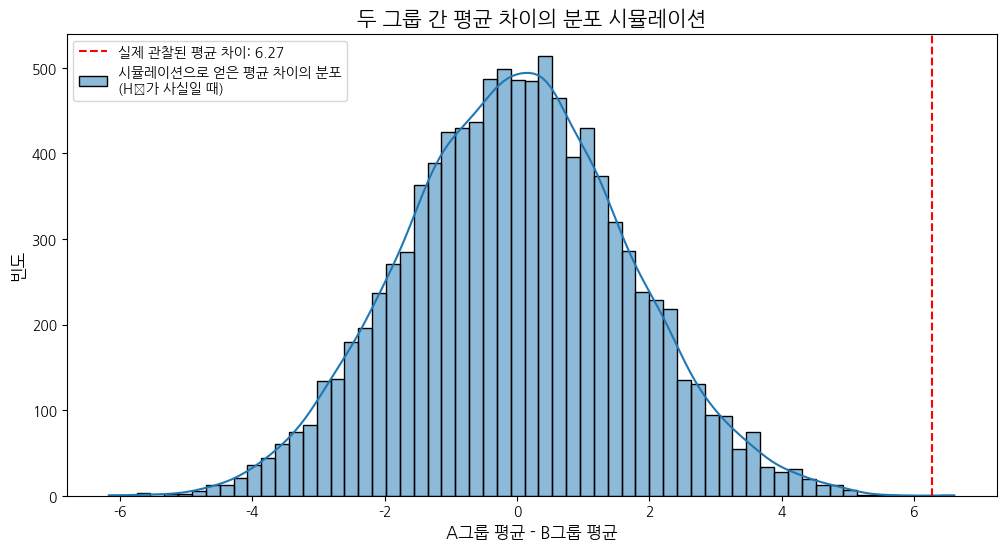

In [11]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 두 그룹의 평균은 같다.
# 두 그룹의 모든 데이터를 합쳐서 하나의 거대한 모집단(H₀)을 만듭니다.
combined_scores = np.concatenate([group_a_scores, group_b_scores])
num_simulations = 10000
simulated_diffs = []

# [작성] for 반복문을 사용하여 시뮬레이션을 10,000번 수행하세요.
# 각 반복마다, 합쳐진 데이터(combined_scores)에서 비복원추출로 50개(가상 A그룹)와 나머지 50개(가상 B그룹)를 뽑아
# 두 그룹의 평균 차이를 계산하고 simulated_diffs 리스트에 추가하세요.
for _ in range(num_simulations):
        shuffled = np.random.permutation(combined_scores)
        simulated_a = shuffled[:50]
        simulated_b = shuffled[50:]
        diff = np.mean(simulated_a) - np.mean(simulated_b)
        simulated_diffs.append(diff)

# 2. 시각화
observed_diff = np.mean(group_a_scores) - np.mean(group_b_scores)
plt.figure(figsize=(12, 6))
sns.histplot(simulated_diffs, kde=True, label='시뮬레이션으로 얻은 평균 차이의 분포\n(H₀가 사실일 때)')
plt.axvline(x=observed_diff, color='red', linestyle='--', label=f'실제 관찰된 평균 차이: {observed_diff:.2f}')
plt.title("두 그룹 간 평균 차이의 분포 시뮬레이션", fontsize=15)
plt.xlabel("A그룹 평균 - B그룹 평균", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  정규성 검정과 등분산성 검정의 p-값은 각각 어떻게 해석해야 하나요? 이 결과는 우리가 이표본 t-검정을 사용하는 데 문제가 없음을 보여주나요?

= 데이터는 정규분포를 따르고, 두 그룹의 분산은 같다. 두 그룹 모두 정규성 검정을 통과하였고, 등분산성 검정에서도 유의미한 차이가 발견되지 않았다. 이에 두 그룹의 데이터는 이표본t검정의 주요 가정을 만족하며, 이표본t검정을 적용하는데 통계적인 문제가 없다고 볼 수 있다.

2.  Part 2의 히스토그램 중심이 0에 가까운 이유는 무엇일까요?

= 히스토그램은 귀무가설: 이 히스토그램은 두 그룹의 평균은 같다가 참일 때의 분포이다. 두 방식의 효과가 같다면 a와 b의 평균의 차이는 크든 작든 0을 중심으로 근처에 위치한다. 좌우 대칭적인 모양으로 0을 중심으로 히스토그램이 위치하고 있으므로, 이것은 귀무가설을 정확히 반영한 그림이라고 할 수 있다.

3.  실제 관찰된 평균 차이(빨간 점선)는 "두 방식의 효과가 같다"고 가정했을 때 우연히 나타날 수 있는 범위 안에 있나요, 아니면 그 범위를 벗어나나요? 이 시각적 판단과 Part 1의 p-값은 어떤 관계가 있나요?

= 빨간 점선은 평균값과 완전히 떨어진 극단적 오른쪽 꼬리에 위치한다. 귀무가설이 참일 때 이런 차이가 나올 확률이 매우 드묾을 의미한다.(마치 주사위를 10번 던졌는데 9번이 6이 나올 확률인 것= 이런 확률은 드물게 나타나는 것이다.) 실제 관찰되는 평균의 차이는 귀무가설 하에서 기대되는 우연적 변동의 범위를 벗어나며, 이는 두 방식의 평균이 같다는 귀무가설을 기각하고(버리고), 두 학습 방식 간 평균 점수 차이가 유의미하다고 결론내릴 수 있다.

---


## **문제 4 (난이도: 중): 연령대별로 선호하는 영화 장르가 다를까?**

**시나리오:**
한 영화관에서 고객의 연령대(20대, 30대, 40대)에 따라 선호하는 영화 장르(액션, 로맨스)에 차이가 있는지 궁금해졌습니다. 이를 알아보기 위해 300명의 고객을 대상으로 설문조사를 진행하여 아래와 같은 분할표를 얻었습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 카이제곱 독립성 검정(Chi-squared Test of Independence)을 사용하여 '연령대'와 '선호 장르'라는 두 범주형 변수 사이에 연관성이 있는지 검증하세요.


In [ ]:
# 데이터 생성 (관측 빈도 분할표)
data = {'액션': [70, 50, 30],
        '로맨스': [30, 60, 60]}
observed = pd.DataFrame(data, index=['20대', '30대', '40대'])
print("관측 빈도 (Observed Frequencies):")
print(observed)

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설):
# H₁ (대립가설):

# [작성] 카이제곱 독립성 검정을 수행하고 카이제곱 통계량, p-값, 기대 빈도를 구하세요.
chi2, p_value, dof, expected = # 여기에 코드 작성

print(f"\nChi-squared statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\n기대 빈도 (Expected Frequencies):")
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))

### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설, 즉 **"연령대와 선호 장르가 서로 아무 관련이 없다면(독립이라면)"** 어떤 분할표들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 시뮬레이션을 통해 얻은 수많은 가상의 카이제곱 통계량 분포와 우리가 실제로 관찰한 카이제곱 통계량을 비교해 보세요.


In [ ]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 두 변수는 독립이다.
# 전체 비율을 기반으로 가상 데이터를 생성합니다.
total_people = observed.sum().sum()
p_genre = observed.sum(axis=0) / total_people # 장르별 전체 비율
p_age = observed.sum(axis=1) / total_people   # 연령대별 전체 비율
num_simulations = 5000
simulated_chi2_stats = []

# [작성] for 반복문을 사용하여 시뮬레이션을 5,000번 수행하세요.
# 각 반복마다, 300명의 가상 고객에게 연령대와 장르를 '독립적으로' 할당한 후,
# 가상 분할표를 만들고 카이제곱 통계량을 계산하여 simulated_chi2_stats 리스트에 추가하세요.
for _ in range(num_simulations):
    # (이 부분 코드는 조금 복잡할 수 있습니다. 아래 힌트를 참고하세요.)
    # 힌트 1: np.random.choice를 사용하여 300명의 연령대와 장르를 각각 독립적으로 생성
    # 힌트 2: pd.crosstab을 사용하여 분할표 생성
    # 힌트 3: stats.chi2_contingency로 카이제곱 통계량 계산

    # 여기에 코드 작성

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_chi2_stats, kde=True, label='시뮬레이션으로 얻은 카이제곱 통계량 분포\n(H₀가 사실일 때)')
plt.axvline(x=chi2, color='red', linestyle='--', label=f'실제 관찰된 카이제곱 통계량: {chi2:.2f}')
plt.title("카이제곱 통계량의 분포 시뮬레이션", fontsize=15)
plt.xlabel("카이제곱 통계량", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  '기대 빈도'는 어떤 의미를 가지며, '관측 빈도'와의 차이가 클수록 카이제곱 통계량은 어떻게 변할까요?
2.  Part 2의 히스토그램은 어떤 분포를 시각화한 것인가요? 실제 관찰된 카이제곱 통계량(빨간 점선)은 이 분포에서 흔한 값인가요, 아니면 극단적인 값인가요?
3.  유의수준 0.05에서, 연령대와 선호하는 영화 장르 사이에 통계적으로 유의미한 연관성이 있다고 결론 내릴 수 있습니까? 그 이유는 무엇인가요?


---


## **문제 5 (난이도: 상): 어떤 신규 비료가 가장 효과적일까?**

**시나리오:**
한 농업 연구소에서 새로 개발한 비료 3종류(A, B, C)의 생산량 증대 효과를 비교하고자 합니다. 동일한 조건의 밭 30개를 준비하여, 각각 10개씩 비료 A, B, C를 투여한 후 수확량을 측정했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:**

1.  분산분석(ANOVA)을 사용하여 세 비료 간 수확량 평균에 유의미한 차이가 있는지 검증하세요.
2.  만약 ANOVA 검정 결과가 유의미하다면, 어떤 비료가 다른 비료와 차이를 보이는지 확인하기 위해 사후분석(Post-hoc test)인 **Tukey's HSD 검정**을 수행하고 결과를 해석하세요.


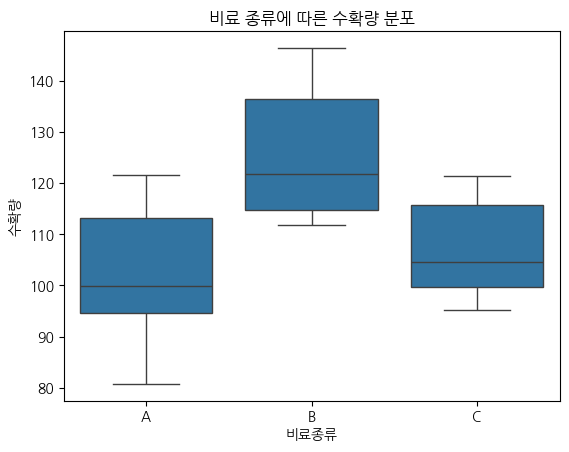

ANOVA F-statistic: 10.3455
ANOVA p-value: 0.0005

Tukey's HSD 사후분석 결과:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  23.6754 0.0006  10.0402 37.3106   True
     A      C   4.8429 0.6569  -8.7923 18.4781  False
     B      C -18.8325 0.0054 -32.4677 -5.1972   True
-----------------------------------------------------


In [13]:
from scipy import stats

# 데이터 생성
np.random.seed(123)
fertilizer_a = np.random.normal(loc=105, scale=10, size=10)
fertilizer_b = np.random.normal(loc=120, scale=12, size=10)
fertilizer_c = np.random.normal(loc=108, scale=9, size=10)

# 데이터프레임으로 변환 (사후분석을 위해)
df = pd.DataFrame({'수확량': np.concatenate([fertilizer_a, fertilizer_b, fertilizer_c]),
                   '비료종류': ['A']*10 + ['B']*10 + ['C']*10})

# 1. 시각화 (데이터 탐색)
sns.boxplot(x='비료종류', y='수확량', data=df)
plt.title('비료 종류에 따른 수확량 분포')
plt.show()

# [작성] 2. 분산분석 (ANOVA)
# H₀: 세 비료의 평균 수확량은 모두 같다.
# H₁: 적어도 하나 이상의 비료 평균 수확량은 다르다.
# 세 그룹에 대해 ANOVA를 수행하고 F-통계량과 p-값을 구하세요.
f_statistic, p_value = stats.f_oneway(
    fertilizer_a,
    fertilizer_b,
    fertilizer_c)
print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

# [작성] 3. 사후분석 (Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA의 p-값이 유의수준 0.05보다 작을 경우에만 사후분석을 수행하는 코드를 작성하세요.
if p_value < 0.05:
    tukey_result = pairwise_tukeyhsd(
        endog=df['수확량'],
        groups=df['비료종류'],
        alpha=0.05
    )
    print("\nTukey's HSD 사후분석 결과:")
    print(tukey_result)
else:
    print("\nANOVA 결과가 유의미하지 않으므로 사후분석을 수행하지 않습니다.")

박스플롯을 통해 비료 B는 다른 비료 대비 중앙값과 전체 분포가 높아 수확량이 좋다는 것을 시각적으로 확인할 수 있다. 반면 비료 A와 C는 분포가 상당 부분 겹쳐 유사한 수준의 수확량을 보인다.

1. meandiff (mean difference): 앞 그룹 평균 − 뒤 그룹 평균
2. p-adj (adjusted p-value) : 여러 쌍을 비교한 것을 고려해서 조정한 p-value
3. lower, upper (신뢰구간) : 0을 포함하면 차이가 무조건 존재, 0이 범위 안에 있으면 차이가 없을 가능성을 시사함
4. reject = True : 귀무가설 기각 → 통계적으로 유의미한 차이
  reject = False:  기각 못 함 → 차이 있다고 말 못 함

### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** ANOVA의 귀무가설, 즉 **"세 비료의 효과가 완전히 똑같다면"** 어떤 F-통계량 값들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 이를 통해 우리가 실제로 관찰한 F-통계량이 얼마나 극단적인 값인지 직접 확인해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


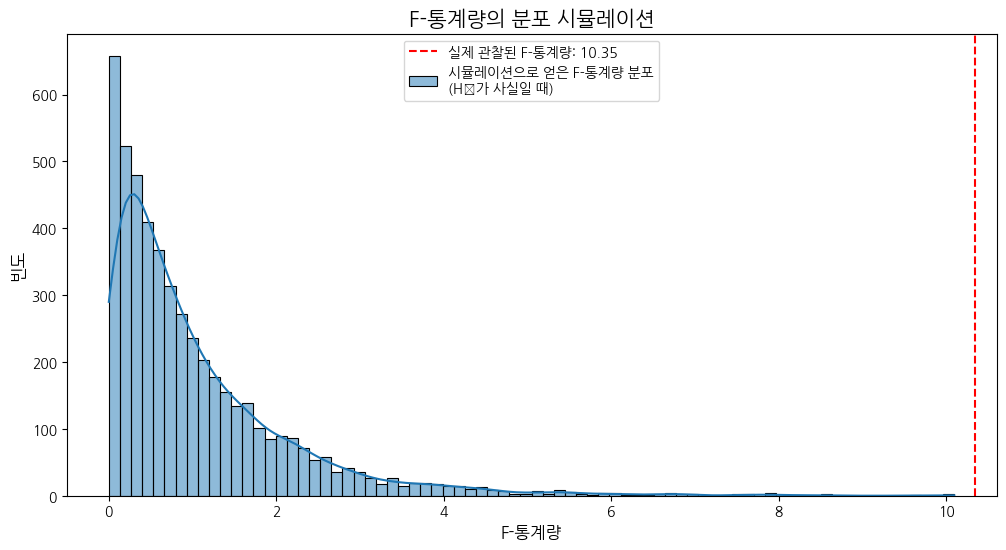

In [15]:
from scipy import stats
import numpy as np

# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 세 그룹의 평균은 모두 같다.
# 모든 데이터를 합쳐서 하나의 거대한 모집단(H₀)을 만들고, 그 평균과 표준편차를 구합니다.
combined_harvest = df['수확량']
grand_mean = combined_harvest.mean()
grand_std = combined_harvest.std()
num_simulations = 5000
simulated_f_stats = []

# [작성] for 반복문을 사용하여 시뮬레이션을 5,000번 수행하세요.
# 각 반복마다, H₀ 모집단에서 10개씩 3개의 가상 그룹을 생성하고,
# 이 가상 그룹들로 ANOVA를 수행하여 F-통계량을 계산하여 simulated_f_stats 리스트에 추가하세요.
for _ in range(num_simulations):
    # H₀가 참인 모집단에서 가상 그룹 3개 생성
    group1 = np.random.normal(loc=grand_mean, scale=grand_std, size=10)
    group2 = np.random.normal(loc=grand_mean, scale=grand_std, size=10)
    group3 = np.random.normal(loc=grand_mean, scale=grand_std, size=10)

    # ANOVA 수행 → F-통계량 계산
    f_stat, _ = stats.f_oneway(group1, group2, group3)

    # 결과 저장
    simulated_f_stats.append(f_stat)

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_f_stats, kde=True, label='시뮬레이션으로 얻은 F-통계량 분포\n(H₀가 사실일 때)')
plt.axvline(x=f_statistic, color='red', linestyle='--', label=f'실제 관찰된 F-통계량: {f_statistic:.2f}')
plt.title("F-통계량의 분포 시뮬레이션", fontsize=15)
plt.xlabel("F-통계량", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

    ANOVA F-statistic: 10.3455
    ANOVA p-value: 0.0005

      =====================================================
      group1 group2 meandiff p-adj   lower    upper  reject
      -----------------------------------------------------
          A      B  23.6754 0.0006  10.0402 37.3106   True
          A      C   4.8429 0.6569  -8.7923 18.4781  False
          B      C -18.8325 0.0054 -32.4677 -5.1972   True
      -----------------------------------------------------

    meandiff (mean difference): 앞 그룹 평균 − 뒤 그룹 평균
    p-adj (adjusted p-value) : 여러 쌍을 비교한 것을 고려해서 조정한 p-value
    lower, upper (신뢰구간) : 0을 포함하면 차이가 무조건 존재, 0이 범위 안에 있으면 차이가 없을 가능성을 시사함
    reject = True : 귀무가설 기각 → 통계적으로 유의미한 차이
    reject = False: 기각 못 함 → 차이 있다고 말 못 함

### **🤔 종합 토의 (생각해 볼 문제)**

1.  ANOVA 검정의 p-값을 통해 어떤 결론을 내릴 수 있나요? 이 결과는 "세 비료가 모두 동일한 효과를 가진다"는 것을 의미하나요, 아니면 "적어도 하나는 다르다"는 것을 의미하나요?

    = ANOVA의 p-값은 매우 작기에, (유의수준 0.05보다 훨씬 작음) 귀무가설을 기각한다. 결과값을 통해 적어도 하나 이상의 비료는 평균 수확량이 다른 것을 알 수 있다.

2.  Tukey's HSD 결과표의 `reject` 열을 보세요. `True`로 표시된 조합은 무엇이며, 이는 무엇을 의미하나요? `meandiff` 열의 값은 어떤 정보를 주나요?

    2-1. reject = True인 것은 해당 두 비료 간 평균 수확량 차이가 통계적으로 유의미함을 말한다. A B와 B C의 그룹에서 TRUE값이 나왔으므로, A B와 B C의 그룹 평균 수확량의 차이가 통계적으로 유의미하다고 결론 지을 수 있다.

    2-2. meandiff = (앞 그룹 평균 - 뒤 그룹 평균)은 어느 비료가 더 높은 수확량을 가지는지 차이가 어느 정도인지 알려준다.
  
    2-2-1. A  B   meandiff = 23.6754  : A의 평균 수확량이 B보다 약 23.7만큼 크다는 걸 의미한다. 그리고 Tukey 결과에서 reject = True, p-adj = 0.0006 값이 아주 작게 나왔다. 두 비료간 평균 차이는 통계적으로 유의미하다고 볼 수 있다. 이에 귀무가설을 기각하여야 한다.

    2-2-2. A  C   meandiff = 4.8429   p-adj = 0.6569 A가 C보다 평균은 약간 높지만 p-value가 매우 크다. (0.65) 이에 (가설을 유지하는 방향으로 해석해야 하고) A와 C의 평균 차이는 귀무가설 하에서 흔히 발생할 수 있는 차이가 된다.

    2-2-3. B  C   meandiff = -18.8325  c의 평균수확량이 b의 평균 수확량보다 약 18.8만큼 크다는 것을 의미한다. 그리고 Tukey 결과에서 reject = True, p-adj = 0.0054로 작은 값이 나왔으므로, 두 비료간 평균의 차이는 유의미하다고 볼 수 있다. 이에 귀무가설을 기각하여야 한다.

    결론: Tukey’s HSD 사후분석 결과, 비료 B는 A 및 C와 비교했을 때 평균 수확량이 통계적으로 유의미하게 높았으며,A와 C 간에는 유의미한 차이가 관찰되지 않았다.

3.  이 모든 분석 결과를 종합하여, 연구소에 어떤 비료를 추천하고 그 이유는 무엇인지 비즈니스 관점에서 설명해 보세요.

    = Tukey’s HSD 사후분석 결과, 비료 b는 비료 a, c와 비교했을 때 평균 수확량이 유의미하게 높은 수치를 보임을 알 수 있었따. 그리고 a와 c는 통계적으로 유의미한 차이가 없었음을 알 수 있었다. 이에 통계적으로 볼 때 비료 b만이 우수한 성능을 보였다고 결론지을 수 있다.

